In [5]:
#import the standard libraries
import os
import caer
import canaro
import numpy as np
import cv2 as cv
import gc
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import LearningRateScheduler

In [6]:
#create a variable image_size and channel and load the dataset
IMAGE_SIZE=(120,120)
channel=1
char_path=r'../input/the-simpsons-characters-dataset/simpsons_dataset'

In [7]:
#create a dictionary
# Creating a character dictionary, sorting it in descending order
char_dict={}
for char in os.listdir(char_path):
    char_dict[char]=len(os.listdir(os.path.join(char_path,char)))
#Sorting the values in the descending order
char_dict=caer.sort_dict(char_dict,descending=True)
char_dict

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('sideshow_bob', 877),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('nelson_muntz', 358),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('waylon_smithers', 181),
 ('maggie_simpson', 128),
 ('groundskeeper_willie', 121),
 ('barney_gumble', 106),
 ('selma_bouvier', 103),
 ('carl_carlson', 98),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('martin_prince', 71),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('cletus_spuckler', 47),
 ('rainier_wolfcastle', 45),
 ('simpsons_dataset', 42),
 ('agnes_skinner', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('fat_tony', 27),
 (

In [8]:
character=[]
count=0
for i in char_dict:
    character.append(i[0])
    count +=1
    if count >=10:
        break
character

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

**Prepare for the traing data**

In [9]:
#train dataset
train=caer.preprocess_from_dir(char_path,character,channels=channel,IMG_SIZE= IMAGE_SIZE, isShuffle=True)

[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] At 1000 files
[INFO] At 2000 files
[INFO] 2246 files found in 1.9687607288360596s
[INFO] At 1000 files
[INFO] 1454 files found in 0.6198368072509766s
[INFO] At 1000 files
[INFO] 1452 files found in 0.6240530014038086s
[INFO] At 1000 files
[INFO] 1354 files found in 0.43700671195983887s
[INFO] At 1000 files
[INFO] 1342 files found in 0.4443550109863281s
[INFO] At 1000 files
[INFO] 1291 files found in 0.31366467475891113s
[INFO] At 1000 files
[INFO] 1206 files found in 0.13326644897460938s
[INFO] At 1000 files
[INFO] 1194 files found in 0.10438060760498047s
[INFO] At 1000 files
[INFO] 1193 files found in 0.08839702606201172s
[INFO] At 1000 files
[INFO] 1079 files found in 0.003922939300537109s
----------------------------------------------
[INFO] 13811 files preprocessed! Took 2m 22s


In [10]:
len(train)

13811

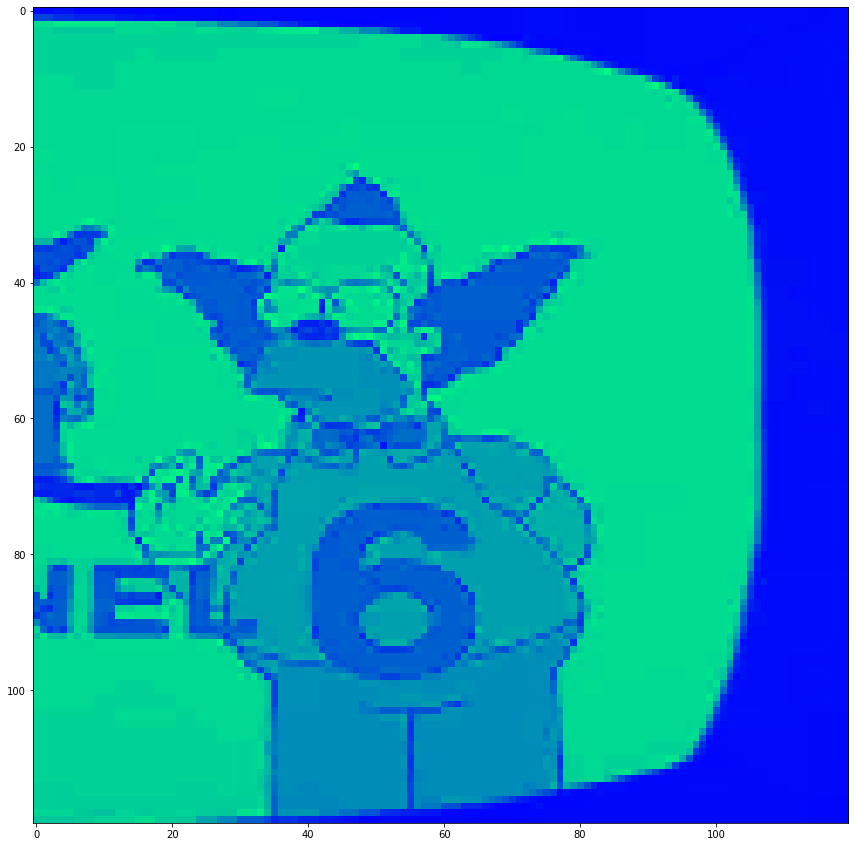

In [11]:
# Visualizing the data (OpenCV doesn't display well in Jupyter notebooks)
plt.figure(figsize=(20,15))
plt.imshow(train[1][0],cmap='winter')
plt.show()

In [12]:
#separate the dataset for taing ing 
featureSet,labels=caer.sep_train(train,IMG_SIZE=IMAGE_SIZE)

In [13]:
#normalize the data into (0,1) because when our machine learnig model as so fast
featureSet=caer.normalize(featureSet)
labels=to_categorical(labels,len(character))

In [14]:
#split the dataset into tarin and validation
x_train, x_val, y_train, y_val = caer.train_val_split(featureSet, labels, val_ratio=.2)

In [15]:
del train
del featureSet
del labels
gc.collect()

23

In [24]:
# Useful variables when training
BATCH_SIZE = 62
EPOCHS = 10

In [25]:
datagen=canaro.generators.imageDataGenerator()
train_gen=datagen.flow(x_train,y_train,batch_size=BATCH_SIZE)

In [26]:
#Creating the model 
model=canaro.models.createSimpsonsModel(IMG_SIZE=IMAGE_SIZE, channels=channel, output_dim=len(character), loss='binary_crossentropy', decay=1e-7, learning_rate=0.001, momentum=0.9, nesterov=True)

In [27]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 120, 120, 32)      320       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 118, 118, 32)      9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 59, 59, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 59, 59, 64)        18496     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 57, 57, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 28, 28, 64)       

In [28]:
callbacks_list=[LearningRateScheduler(canaro.lr_schedule)]
#Traing the dataset
traing=model.fit(train_gen,
                    steps_per_epoch=len(x_train)//BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(x_val,y_val),
                    validation_steps=len(y_val)//BATCH_SIZE,
                    callbacks = callbacks_list)

Epoch 1/10
178/178 [==============================] - 20s 105ms/step - loss: 0.3578 - accuracy: 0.1558 - val_loss: 0.3317 - val_accuracy: 0.1552
Epoch 2/10
178/178 [==============================] - 17s 94ms/step - loss: 0.3233 - accuracy: 0.1616 - val_loss: 0.3317 - val_accuracy: 0.1552
Epoch 3/10
178/178 [==============================] - 17s 97ms/step - loss: 0.3234 - accuracy: 0.1640 - val_loss: 0.3306 - val_accuracy: 0.1552
Epoch 4/10
178/178 [==============================] - 17s 93ms/step - loss: 0.3228 - accuracy: 0.1646 - val_loss: 0.3311 - val_accuracy: 0.1552
Epoch 5/10
178/178 [==============================] - 17s 93ms/step - loss: 0.3223 - accuracy: 0.1658 - val_loss: 0.3314 - val_accuracy: 0.1556
Epoch 6/10
178/178 [==============================] - 17s 97ms/step - loss: 0.3206 - accuracy: 0.1649 - val_loss: 0.3282 - val_accuracy: 0.1773
Epoch 7/10
178/178 [==============================] - 17s 94ms/step - loss: 0.3129 - accuracy: 0.2025 - val_loss: 0.3146 - val_accuracy

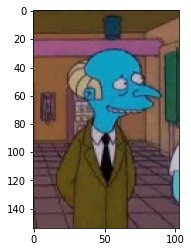

In [21]:
test_path = r'../input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/charles_montgomery_burns_0.jpg'

img = cv.imread(test_path)

plt.imshow(img)
plt.show()


In [29]:
def prepare(image):
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    image = cv.resize(image, IMAGE_SIZE)
    image = caer.reshape(image, IMAGE_SIZE, 1)
    return image


In [30]:
predictions = model.predict(prepare(img))

In [31]:
# Getting class with the highest probability
print(character[np.argmax(predictions[0])])

lisa_simpson
